In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def mean_squared_error(array1 , array2):
    if array1.shape == array2.shape:
        err = np.sum((array1.astype('float') - array2.astype('float')) ** 2)
        err /= array1.shape[0]
        return err
    else:
        print('arrays do not have same shapes')
        return None

In [5]:
insurance_data = pd.read_csv('insurance.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'insurance.csv'

In [6]:
df = pd.DataFrame(insurance_data)
df.head()

NameError: name 'insurance_data' is not defined

In [64]:
J1 = []
        
def h_teta(x , teta):
    return (x * teta).sum(1)
        
def multi_gradient(X, Y , D , loss_function):
        hx = h_teta(X, D)
        if loss_function == 'mse':
            return ((hx - Y) * X.transpose()).mean(1)
        
        elif loss_function == 'mae':
            return (np.sign(hx - Y) * X.transpose()).mean(1)

def gradient_multi( gradient, x, y, start_point, epoch , state  ,  learn_rate=0.0001 , batch_size = 1,
                    loss_function = 'mse' , normalize = True , starting_point_zero = False , tolerance = 0.000005 ):         
    if(starting_point_zero == False):
        start_point = np.random.normal(0, y.std() / x.std(), x.shape[1]) 
    
    teta_history  = []
    error_history = []
    optimal = False  
    for i in range(epoch):
            if optimal:
                break
            for j in range(0, len(y), batch_size):
                x_ = x[j:j+batch_size]
                y_ = y[j:j+batch_size]
                
                diff = gradient(x_, y_, start_point , loss_function)
                if np.all(np.abs(diff) <= tolerance):
                     optimal = True
                        
                start_point = start_point - learn_rate * diff
                
                if(state == 0 ):
                    teta_history.append(start_point)
                    
                    if loss_function == 'mse':
                        error_history.append( np.mean((h_teta(x , start_point) - y)**2 ) ) 
                    elif loss_function == 'mae':
                        error_history.append( np.mean( np.abs((h_teta(x , start_point) - y) )) )
                    
    return start_point , teta_history , error_history

charges = df.pop('charges').to_numpy('float64')
X = df.to_numpy('float64')
Real_X = np.ones((X.shape[0],X.shape[1]+1))
Real_X[:,1:X.shape[1] + 1 ] = X

start_point = np.zeros(Real_X.shape[1])

optimal_tetas_SGD , teta_history_SGD , error_history_SGD = gradient_multi(multi_gradient, Real_X , 
                                                             charges , start_point , 4 , 0)

optimal_tetas_GD , teta_history_GD , error_history_GD = gradient_multi(multi_gradient, Real_X , charges , start_point,
                                                                       5000 , 0 , batch_size=charges.shape[0])

optimal_tetas_MBGD , teta_history_MBGD , error_history_MBGD = gradient_multi(multi_gradient, Real_X , 
                                                                             charges , start_point, 38 , 0 , 
                                                                             batch_size=10)                                                                      

## سوال 1 الف

Text(0.5, 1.0, 'MBGD')

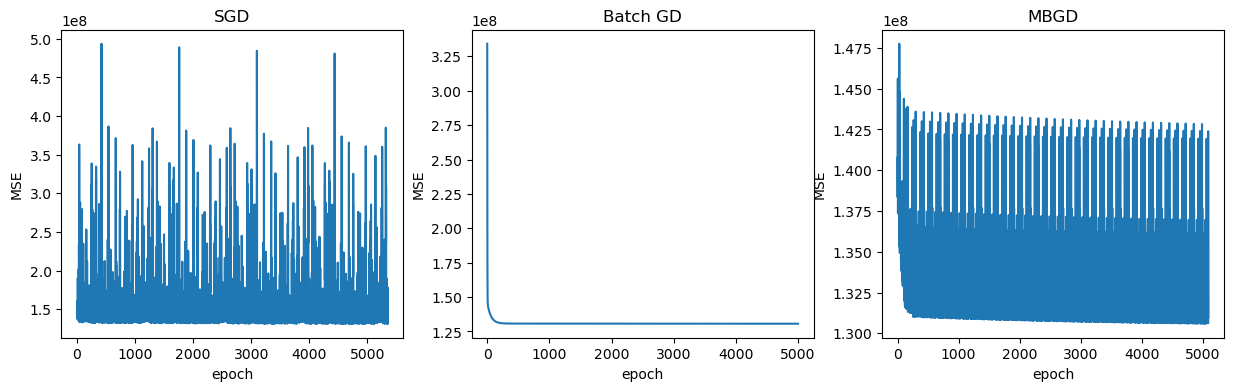

In [7]:
plt.figure(figsize=(15,4))
plt.subplot(1 , 3 , 1)
plt.plot(error_history_SGD)
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.title('SGD')

plt.subplot(1 , 3 , 2)
plt.plot(error_history_GD)
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.title('Batch GD')

plt.subplot(1 , 3 , 3)
plt.plot(error_history_MBGD)
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.title('MBGD')

## سوال 1 ب

<div dir="rtl">
روش SGD نسبت به روش های دیگر کند تر ولی با عدد خطای کمتری می باشد دلیل آن هم این است که ما در این روش چون حتما می بایست تک به تک داده ها را ابتدا ببینیم و سپس بلافاصله آپدیت پارامتر ها را انجام دهیم ، این روش به طور کلی کند می باشد . در توابع نوشته شده کتابخانه های پایتون هم می بینیم که عملیات در صورتی که بچ سایز برگرتری انتخاب شده باشند ، می توانند به صورت موازی و سریعتر انجام شوند چون مثلا 2000 داده ی اول نیازی ندارند تا منتظر داده های قبل از خود بمانند تا محاسبه ی آپدیت وزن ها انجام شود بلکه همه ی آن ها می توانند به طور موازی و با وزن های قبلی محاسباتی انجام دهند و نهایتا آپدیت نهایی میانگین این ها خواهد بود . با توجه به توضیحات داده شده هر چقدر که عدد بچ سایز کم تر می شود ، سرعت اجرا کند تر ولی دقت بالاتر می رود و همواره یک
trade off در این بین وجود دارد . بنابراین
GD = بیشترین خطا و کم ترین زمان اجرا
mini batch GD = خطای وسطی و زمان اجرای وسطی (به نسبت 2 تای دیگر)
SGD = کم ترین خطا و بیشترین زمان اجرا با توجه به نکات بیان شده اعوجاج ها نیز توجیه می شوند :
SGD : به خاطر آپدیت های لحظه ای و مداوم اعوجاج بسیار زیاد
GD : به خاطر آپدیت های کم تر و یک باره اعوجاج کم
MBGD : ما بین دو روش قبلی
البته چون در اینجا ما داده ی نسبتا کمی داریم اعوجاج روش اول تا این حد زیاد شده است و با افزایش داده ها این اعوجاجا ها هم سبک تر خواهند ش

</div>


## سوال 1 ج

Text(0.5, 1.0, 'learn_rate=0.00001')

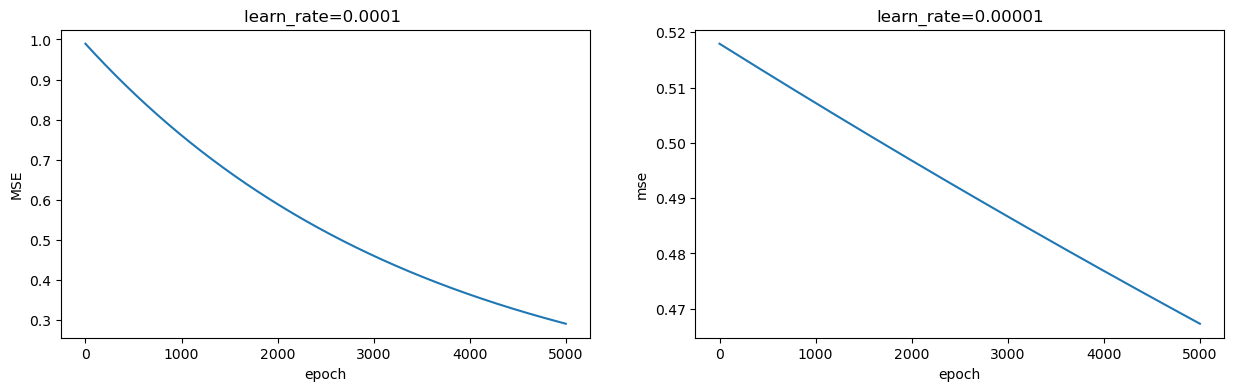

In [10]:
optimal_tetas_GD , teta_history_GD , error_history_GD = gradient_multi(multi_gradient, Real_X , 
                                                             charges , start_point , 5000 , 0  , learn_rate=0.0001,
                                                                         batch_size=charges.shape[0])
optimal_tetas_GD1 , teta_history_GD1 , error_history_GD1 = gradient_multi(multi_gradient, Real_X , 
                                                             charges , start_point , 5000 , 0 , learn_rate=0.00001,
                                                                            batch_size=charges.shape[0])
plt.figure(figsize=(15,4))
plt.subplot(1 , 2 , 1)
plt.plot(error_history_GD)
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.title('learn_rate=0.0001 ')

plt.subplot(1 , 2 , 2)
plt.plot(error_history_GD1)
plt.xlabel('epoch')
plt.ylabel('mse')
plt.title('learn_rate=0.00001')

## سوال 1 د

C:\Users\alire\AppData\Local\Temp\ipykernel_724\1275129175.py:39: RuntimeWarning: overflow encountered in square
  error_history.append( np.mean((h_teta(x , start_point) - y)**2 ) )
C:\Users\alire\AppData\Local\Temp\ipykernel_724\1275129175.py:9: RuntimeWarning: invalid value encountered in multiply
  return ((hx - Y) * X.transpose()).mean(1)
C:\Users\alire\AppData\Local\Temp\ipykernel_724\1275129175.py:33: RuntimeWarning: invalid value encountered in subtract
  start_point = start_point - learn_rate * diff


Text(0.5, 1.0, 'learn_rate=2')

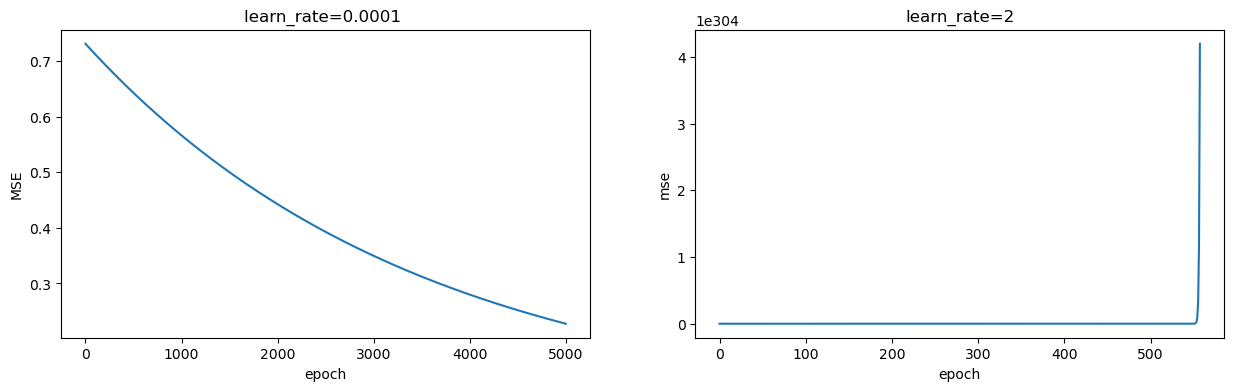

In [16]:
optimal_tetas_GD , teta_history_GD , error_history_GD = gradient_multi(multi_gradient, Real_X , 
                                                             charges , start_point , 5000 , 0  , learn_rate=0.0001,
                                                                         batch_size=charges.shape[0])
optimal_tetas_GD1 , teta_history_GD1 , error_history_GD1 = gradient_multi(multi_gradient, Real_X , 
                                                             charges , start_point , 5000 , 0 , learn_rate=2,
                                                                            batch_size=charges.shape[0])
plt.figure(figsize=(15,4))
plt.subplot(1 , 2 , 1)
plt.plot(error_history_GD)
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.title('learn_rate=0.0001 ')

plt.subplot(1 , 2 , 2)
plt.plot(error_history_GD1)
plt.xlabel('epoch')
plt.ylabel('mse')
plt.title('learn_rate=2')

<div dir="rtl">
  اگر نرخ یادگیری را خیلی زیاد افزایش دهیم مدل همگرا نمی شود و اگر آن را خیلی کم کنیم تعداد گام های که لازم است به مینیمم همگرا شود افزایش می یابد.
    و سرعت همگرایی کاهش می یابد.
</div>    

<img src="https://www.jeremyjordan.me/content/images/2018/02/Screen-Shot-2018-02-24-at-11.47.09-AM.png" >

## سوال 1 ه

Text(0.5, 1.0, 'normalization')

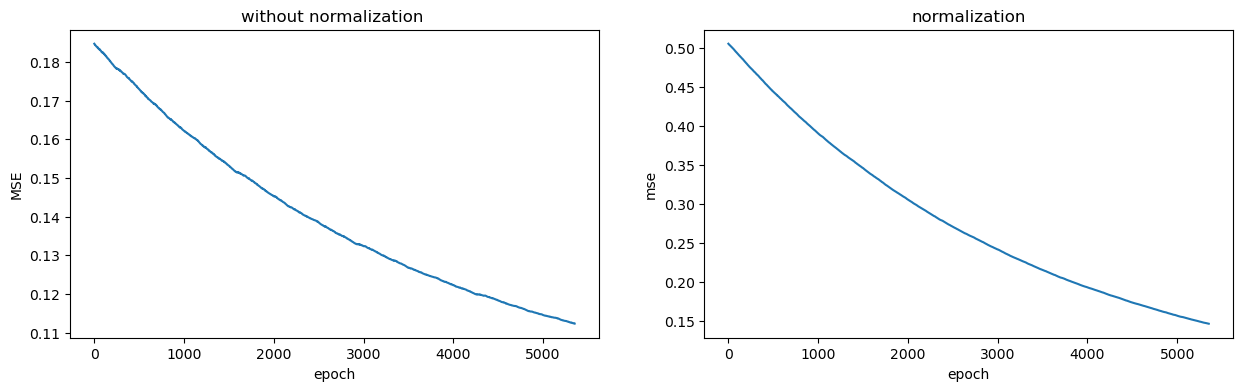

In [17]:

optimal_tetas_SGD2 , teta_history_SGD2 , error_history_SGD2 = gradient_multi(multi_gradient, Real_X , 
                                                             charges , start_point , 4 , 0)

insurance_data = pd.read_csv('insurance.csv')
df = pd.DataFrame(insurance_data)
df = (df-df.min())/(df.max()-df.min())
charges = df.pop('charges').to_numpy('float64')
X = df.to_numpy('float64')
Real_X = np.ones((X.shape[0],X.shape[1]+1))
Real_X[:,1:X.shape[1] + 1 ] = X

start_point = np.zeros(Real_X.shape[1])

N_optimal_tetas_SG , N_teta_history_SGD , N_error_history_SGD = gradient_multi(multi_gradient, Real_X , 
                                                             charges , start_point , 4 , 0)
plt.figure(figsize=(15,4))
plt.subplot(1 , 2 , 1)
plt.plot(error_history_SGD2)
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.title('without normalization ')

plt.subplot(1 , 2 , 2)
plt.plot(N_error_history_SGD)
plt.xlabel('epoch')
plt.ylabel('mse')
plt.title('normalization')

<div dir="rtl">
    اگر بخواهیم سرعت همگرایی را در حالت نرمال سازی شده با حالت قبلی مقایسه کنیم می توان گفت که به بازه داده ها وایسته است به این معنا که نرمال سازی هم می تواند باعث افزایش سرعت همگرایی شود هم باعث کاهش سرعت همگرایی شود به این صورت که اگر محدوده داده ها کمتر شود سرعت نیز کمتر می شود در این قسمت سوال می بینیم که سرعت همگرایی افزایش پیدا کرده چون داده های ما در بازه های مختلفی قرار دارند.
</div>   

## سوال 1 و

In [24]:
from sklearn.linear_model import LinearRegression

x = insurance_data.drop(["charges"],axis = 1).to_numpy("float")
y= insurance_data["charges"].to_numpy("float")

linear_regression = LinearRegression()
linear_regression.fit(x , y)

output = linear_regression.predict(x)
mse = mean_squared_error(y,output)
np.log(mse)

18.67488290144849

In [37]:
optimal_tetas_GD , teta_history_GD , error_history_GD = gradient_multi(multi_gradient, Real_X , 
                                                             charges , start_point , 1000 , 0  , learn_rate=0.0001,
                                                                         batch_size=charges.shape[0])

final_error = error_history_GD[999]
print("final error of our model is : ", final_error)

final error of our model is :  0.12727780301724836


<div dir="rtl">
    باتوجه به خطا های مشاهده شده میزان خطا در تابع رگرسیون خطی موجود در کتابخانه از مدلی که خودمان درست کرده ایم کمتر می باشد و سرعت اجرای کتابخانه اماده و سرعت همگرایی کتابخانه آماده بیشتر است.
</div>    

## سوال 1 ز

In [7]:
x = np.append(np.full((len(x),1),1),x,1)
y = y.reshape(y.shape[0],1)
T = np.dot(np.linalg.inv(np.dot(x.T,x)), np.dot(x.T,y))
T

NameError: name 'x' is not defined

In [43]:
optimal_tetas_GD , teta_history_GD , error_history_GD = gradient_multi(multi_gradient, Real_X , 
                                                             charges , start_point , 1000 , 0  , learn_rate=0.0001,
                                                                         batch_size=charges.shape[0])

print("final theta of our model is : ", optimal_tetas_GD)

final theta of our model is :  [ 0.77149429 -0.07151542 -0.57261336  0.29537749]


## سوال 2

In [90]:
insurance_data = pd.read_csv('insurance.csv').to_numpy("float")
np.random.shuffle(insurance_data)

num = int(0.8 * insurance_data.shape[0])
train , test = insurance_data[:num,:] , insurance_data[num : ,:]
x_train , y_train = train[:,0:3] , train[:,3:4]
x_test , y_test = test[:,0:3] , test[:,3:4]


## سوال 2 الف

Text(0.5, 1.0, 'MAE error')

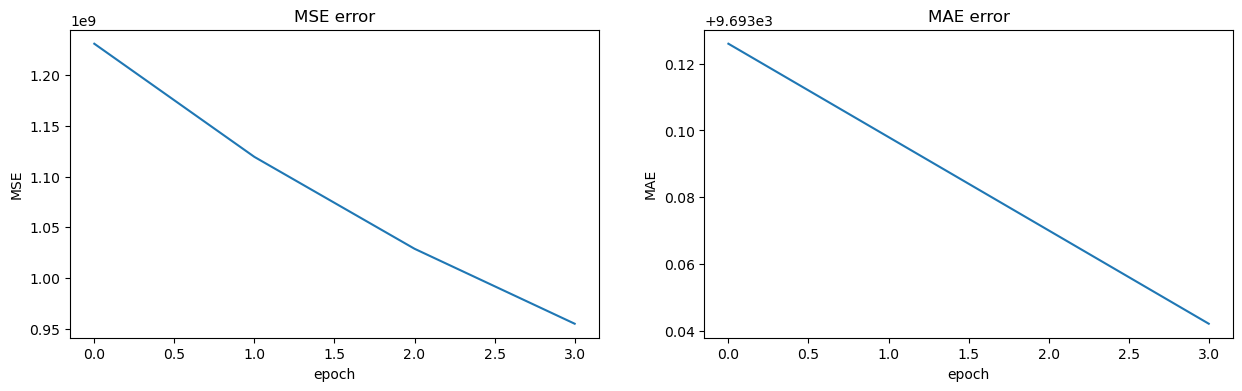

In [91]:
optimal_tetas_SGD , teta_history_SGD , error_history_SGD = gradient_multi(multi_gradient, x_train , 
                                                             y_train.reshape(1,y_train.shape[0]) , start_point , 4 , 0 , loss_function = 'mse' )
optimal_tetas_SGD1 , teta_history_SGD1 , error_history_SGD1 = gradient_multi(multi_gradient, x_train , 
                                                             y_train.reshape(1,y_train.shape[0]) , start_point , 4 , 0 , loss_function = 'mae' )
plt.figure(figsize=(15,4))
plt.subplot(1 , 2 , 1)
plt.plot(error_history_SGD)
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.title('MSE error')

plt.subplot(1 , 2 , 2)
plt.plot(error_history_SGD1)
plt.xlabel('epoch')
plt.ylabel('MAE')
plt.title('MAE error')

## سوال 2 ب

<div dir="rtl">
 
از آن جایی که در محاسبه زیان ام اس ای از مربع خطا استفاده می شود اگر میزان خطا بزرگتر از یک باشد مقدار آن بزرگ می شود با وجود داده ی پرت خطا افزایش یافته و زیان ام اس ای 
خطا را بسیار بزرگ تر نشان می دهد بنابراین بنظر می رسد داده های پرت در محاسبه ام اس ای وزن بیشتری نسبت به ام ای ای دارند و در این مثال با استفاده از هر دو روش داده ها همگرا شده اند
</div>    

## سوال 2 ج

Text(0.5, 1.0, ' MAE normalized ')

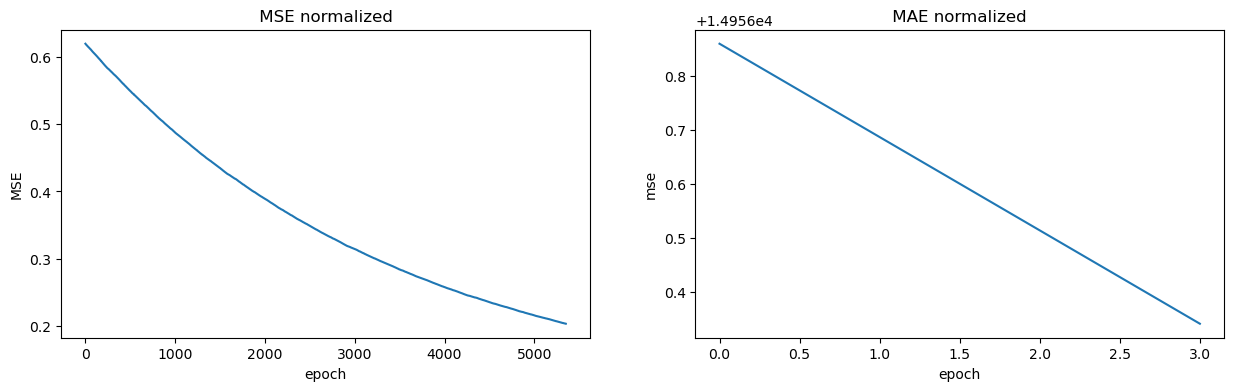

In [92]:
insurance_data = pd.read_csv('insurance.csv')
df = pd.DataFrame(insurance_data)
df = (df-df.min())/(df.max()-df.min())
charges = df.pop('charges').to_numpy('float64')
X = df.to_numpy('float64')
Real_X = np.ones((X.shape[0],X.shape[1]+1))
Real_X[:,1:X.shape[1] + 1 ] = X

start_point = np.zeros(Real_X.shape[1])

optimal_tetas_SGD , teta_history_SGD , error_history_SGD = gradient_multi(multi_gradient, x_train , 
                                                             y_train.reshape(1,y_train.shape[0]) , start_point , 4 , 0 , loss_function = 'mse' )
optimal_tetas_SGD1 , teta_history_SGD1 , error_history_SGD1 = gradient_multi(multi_gradient, x_train , 
                                                             y_train.reshape(1,y_train.shape[0]) , start_point , 4 , 0 , loss_function = 'mae' )
plt.figure(figsize=(15,4))
plt.subplot(1 , 2 , 1)
plt.plot(error_history_SGD2)
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.title(' MSE normalized ')

plt.subplot(1 , 2 , 2)
plt.plot(error_history_SGD1)
plt.xlabel('epoch')
plt.ylabel('mse')
plt.title(' MAE normalized ')

In [ ]:
<div dir="rtl">
بعد از نرمال سازی داده ها اعوجاج کمتر شده و مدل راح تر همگرا شده است
</div>